In [2]:
from data_handling import Logger
import numpy as np

In [ ]:
logger = Logger()
logger.agent_count = 2

In [ ]:
logger.graph(logdir="saves/from_AWS/1/MAD4PG_20190326_v010/logs")

In [4]:
import matplotlib.pyplot as plt

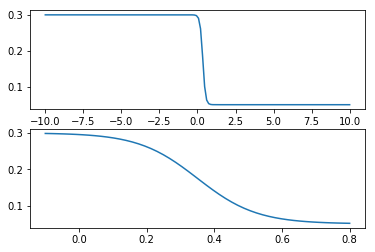

In [7]:
ylow = .05
yhigh = .3
xlow = 0
xhigh = .7
box = [xlow, xhigh, ylow, yhigh]

def e(x, box):
    xlow = box[0]
    xhigh = box[1]
    ylow = box[2]
    yhigh = box[3]
    steepmult = 8
    steepness = steepmult / (xhigh - xlow)
    offset = (xhigh + xlow) / 2
    midpoint = yhigh - ylow
        x = steepness * (x - offset)
    curve = ylow + midpoint / (1 + np.exp(x))
    return curve

x = np.linspace(-10, 10, 150)
plt.figure(1)
plt.subplot(211)
plt.plot(x, e(x, box))
x = np.linspace(xlow-.1, xhigh+.1, 50)
plt.subplot(212)
plt.plot(x, e(x, box))


In [8]:
import agent
from environment import Environment
import importlib
import os.path
import random
import re
import sys
import time
from data_handling import Logger

import torch
import matplotlib.pyplot as plt
import numpy as np
from unityagents import UnityEnvironment
from collections import deque
import torchvision.transforms as T

In [464]:
class Args:
    def __init__(self):
        self.train = True
        self.nographics = False
        self.num_eps = 10
        self.rollout = 5
        self.batchsize = 64
        self.pretrain = 1000
        self.num_episodes = 1
        self.max_time = 50
        self.alr = 1e-4
        self.clr = 1e-4
        self.batch = 128
        self.buffer = 100000
        self.C = 4000        
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")        
        self.eval = False
        self.observe = False
        self.e = 0.3
        self.e_min = 0.05
        self.e_decay = 1
        self.update_type = "soft"
        self.tau = 0.0001
        self.actor_learn_rate = 0.001
        self.critic_learn_rate = 0.001
        self.gamma = 0.99
        self.num_atoms = 51
        self.vmin = 0
        self.vmax = 1
        self.layer_sizes = [200, 200]
        self.batch_size = 128
        self.buffer_size = 10000
        
args = Args()
def check_args():
    for arg in vars(args):
        if arg == "sep": continue
        print("{}: {}".format(arg.upper(), getattr(args, arg)))
        
check_args()        


TRAIN: True
NOGRAPHICS: False
NUM_EPS: 10
ROLLOUT: 5
BATCHSIZE: 64
PRETRAIN: 1000
NUM_EPISODES: 1
MAX_TIME: 50
ALR: 0.0001
CLR: 0.0001
BATCH: 128
BUFFER: 100000
C: 4000
DEVICE: cuda:0
EVAL: False
OBSERVE: False
E: 0.3
E_MIN: 0.05
E_DECAY: 1
UPDATE_TYPE: soft
TAU: 0.0001
ACTOR_LEARN_RATE: 0.001
CRITIC_LEARN_RATE: 0.001
GAMMA: 0.99
NUM_ATOMS: 51
VMIN: 0
VMAX: 1
LAYER_SIZES: [200, 200]
BATCH_SIZE: 128
BUFFER_SIZE: 10000


In [444]:
env = Environment(args)

LOADING ON SYSTEM: Windows
##################################################
#                                                #


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


#                                                #
##################################################


KeyError: 'TennisBrain'

In [15]:
p = "saves/MAD4PG_20190329_v001/logs"

In [16]:
print(os.path.dirname(p))

saves/MAD4PG_20190329_v001


In [30]:
for _ in range(50):
    print(np.random.normal(1.2,.2))


1.20334751358825
0.8237101166274532
0.9098749053156494
1.3182056155454625
0.9398638830510315
1.3445402476825352
1.5652887288336523
1.271730036944961
1.345231280241829
1.2050277940285965
1.4410879330060329
1.2857098484452767
1.1361126480494859
0.987522170450696
1.1826370219483202
0.9255211500498843
1.156126282900841
1.2374580845609815
1.0398461227194375
1.0372785762376036
1.1414967347891363
1.4463582437486044
1.2365642125648149
1.566092121513846
1.0603026940318467
1.1205402745777227
1.1095523351772036
0.8656975806037823
0.9764209625433122
1.3579690308291958
1.1562092487481326
1.2350981665206566
1.3362424406489226
0.7953894128137438
1.0366338302523983
1.0688013892164767
1.3078035327274555
1.3357837757354711
1.3884019750446104
1.626055671161386
1.365649016044203
1.1367816716955728
1.1637515336429611
0.8675880751477012
0.8817732587516784
1.1411488408659538
1.2057450027625567
1.422688784222598
1.2020653616905672
1.217204385576874


In [473]:
import agent
importlib.reload(agent)

a = agent.MAD4PG_Net(env, args)

In [474]:
print(a.e)

0.2955034475094771


In [479]:
a.avg_score = 3.975

In [480]:
print(a.e)

0.05449655249052289


In [35]:
import data_handling
importlib.reload(data_handling)
from data_handling import Logger
logger = Logger()
logger.agent_count = 2


Blank init for Logger object. Most functionality limited.


In [33]:
p = "saves/from_AWS/2/MAD4PG_20190329_v004/logs"

#########################################################################################
Saved graph data to: saves/from_AWS/2/MAD4PG_20190329_v004/MAD4PG_20190329_v004_graph.png
#########################################################################################


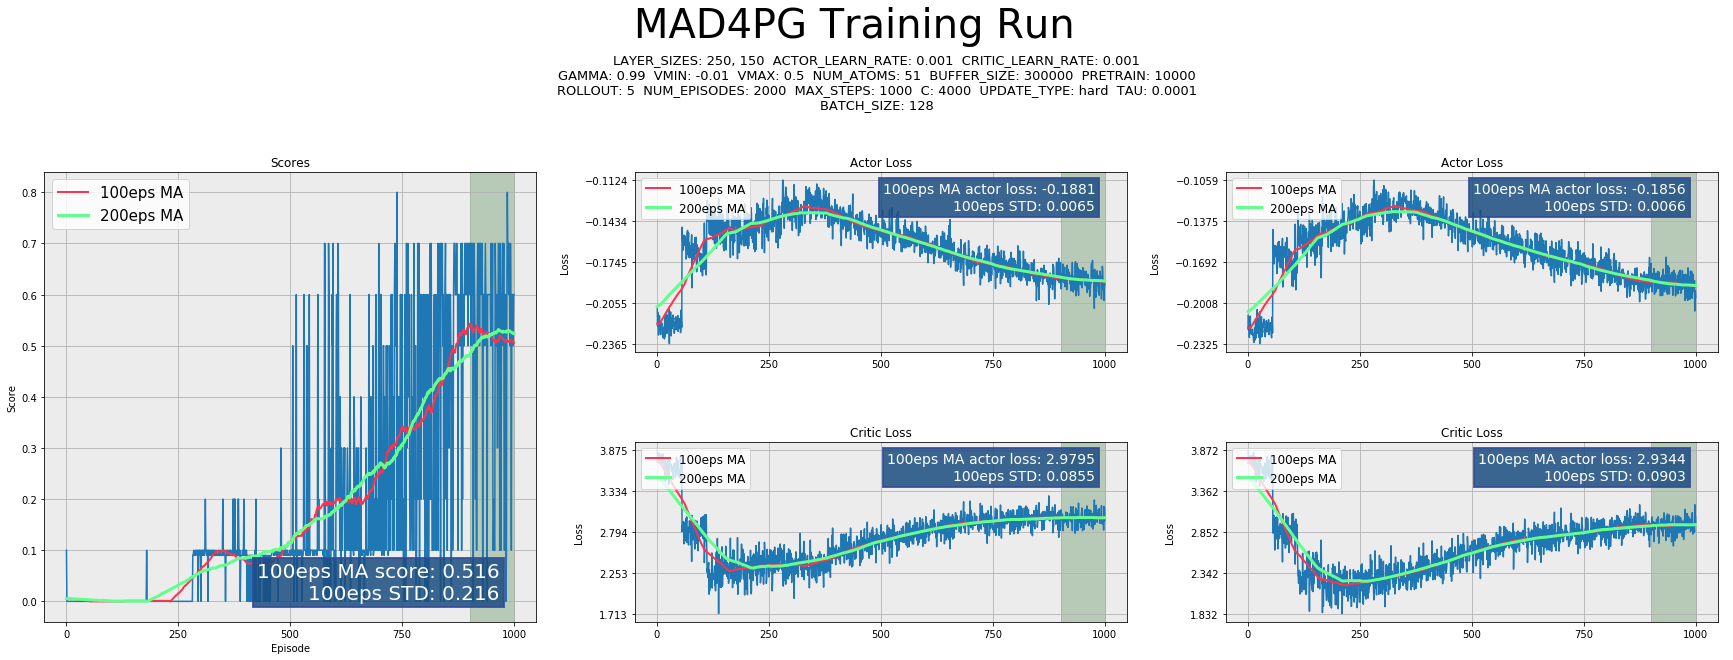

In [34]:
logger.graph(logdir=p)

In [23]:
p = "saves/from_AWS/1/MAD4PG_20190329_v007/logs"

#########################################################################################
Saved graph data to: saves/from_AWS/2/MAD4PG_20190329_v005/MAD4PG_20190329_v005_graph.png
#########################################################################################


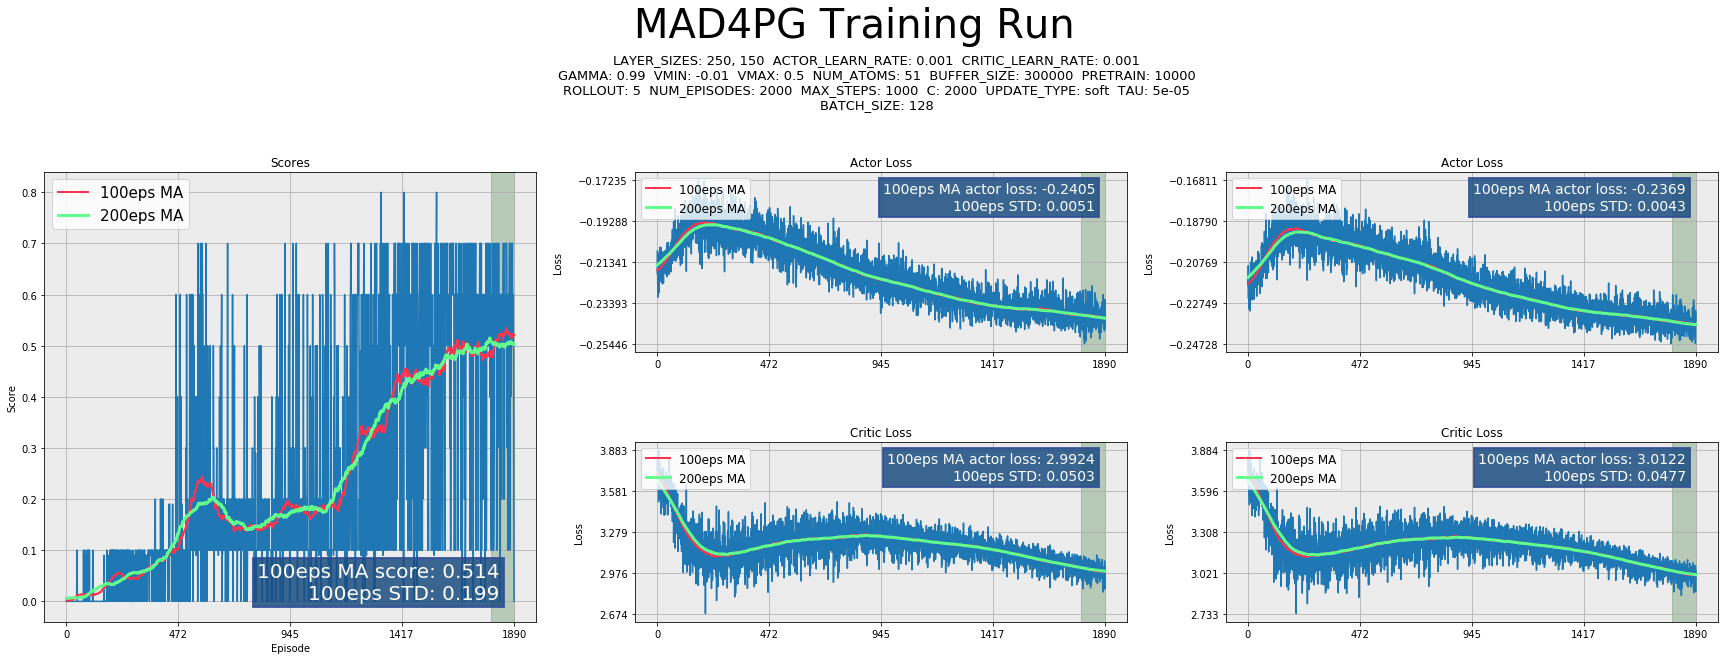

In [31]:
logger.graph(logdir=p)

In [25]:
p = "saves/from_AWS/2/MAD4PG_20190329_v005/logs"

#########################################################################################
Saved graph data to: saves/from_AWS/2/MAD4PG_20190329_v005/MAD4PG_20190329_v005_graph.png
#########################################################################################


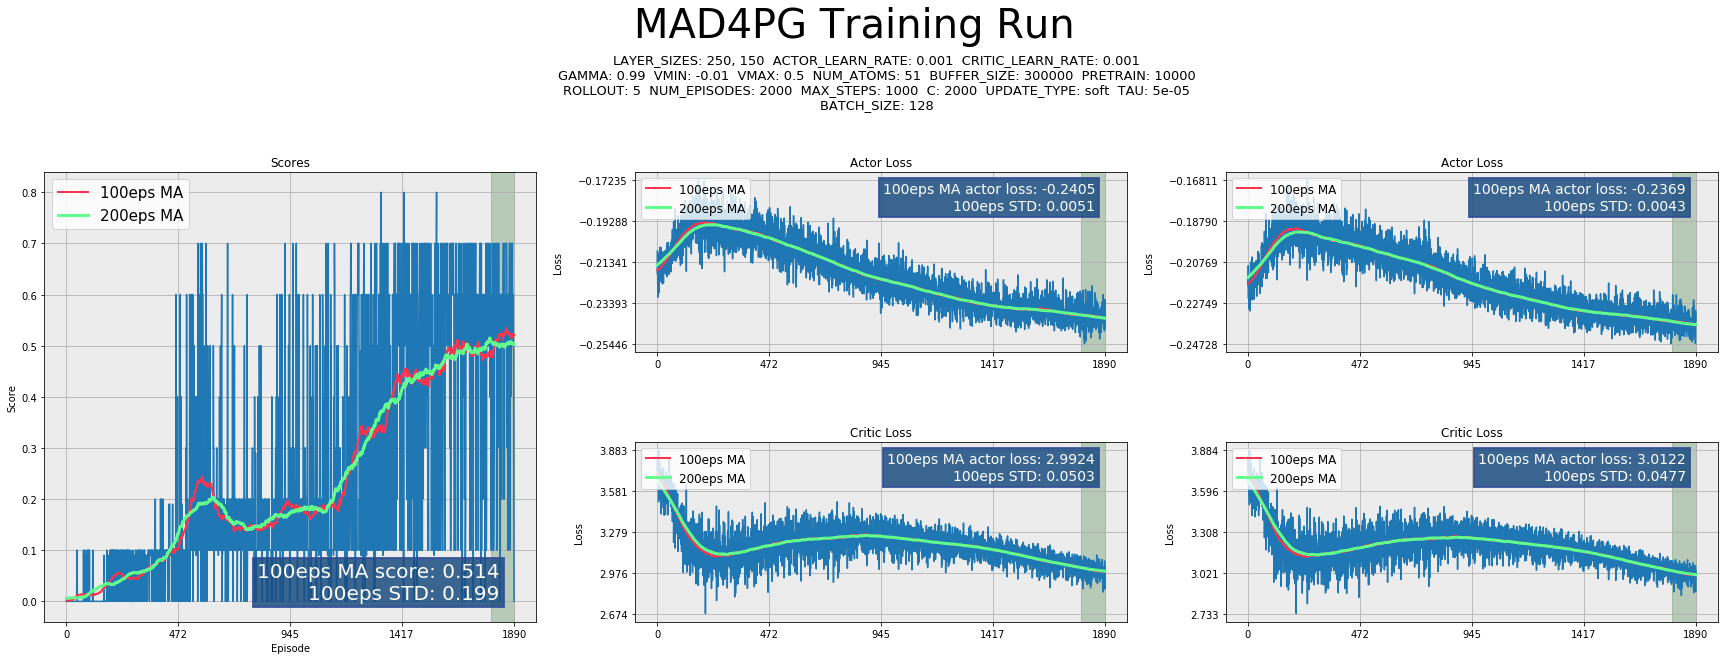

In [26]:
logger.graph(logdir=p)